# Proyek Akhir: Menyelesaikan Permasalahan Institusi Pendidikan

- Nama : Usamah Putra Firdaus
- Email : usamahfirdaa@gmail.com
- Id Dicoding : Usamah Putra Firdaus

# **Preparation**

## **Import Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import collections
import joblib

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import RobustScaler, LabelEncoder

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, roc_curve, auc

## **Data Loading**

In [2]:
# Dataset import from Dicoding GitHub Repository
dataset_url = 'https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/refs/heads/main/students_performance/data.csv'

# Read dataset
df = pd.read_csv(dataset_url, delimiter=';')
df

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


# **Data Understanding**

## **Data Basic Information**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

Data ini berisi informasi pada saat pendaftaran mahasiswa, seperti jalur akademik, informasi demografis, dan faktor sosial ekonomi, beserta kinerja akademik mereka pada akhir semester pertama dan kedua.

- **Marital status** - Status pernikahan mahasiswa
- **Application mode** - Metode yang digunakan mahasiswa untuk mendaftar
- **Application order** - Urutan pilihan jurusan saat mendaftar (antara 0 - pilihan pertama; dan 9 - pilihan terakhir)
- **Course** - Program studi yang diambil oleh mahasiswa
- **Daytime/evening attendance** - Waktu kehadiran kuliah mahasiswa, apakah mengikuti kelas di siang atau malam hari
- **Previous qualification** - Kualifikasi pendidikan terakhir sebelum masuk perguruan tinggi
- **Previous qualification (grade)** - Nilai dari kualifikasi sebelumnya (antara 0 dan 200)
- **Nacionality** - Kewarganegaraan mahasiswa
- **Mother's qualification** - Tingkat pendidikan terakhir ibu mahasiswa
- **Father's qualification** - Tingkat pendidikan terakhir ayah mahasiswa
- **Mother's occupation** - Pekerjaan ibu mahasiswa
- **Father's occupation** - Pekerjaan ayah mahasiswa
- **Admission grade** - Nilai masuk mahasiswa ke perguruan tinggi (antara 0 dan 200)
- **Displaced** - Apakah mahasiswa merupakan orang yang mengungsi (1 = ya, 0 = tidak)
- **Educational special needs** - Apakah mahasiswa memiliki kebutuhan pendidikan khusus (1 = ya, 0 = tidak)
- **Debtor** - Apakah mahasiswa memiliki tunggakan pembayaran (1 = ya, 0 = tidak)
- **Tuition fees up to date** - Apakah pembayaran biaya kuliah mahasiswa sudah lunas/terbayar (1 = ya, 0 = tidak)
- Gender - Jenis kelamin mahasiswa (1 = laki-laki, 0 = perempuan)
- **Scholarship holder** - Apakah mahasiswa penerima beasiswa (1 = ya, 0 = tidak)
- **Age at enrollment** - Usia mahasiswa saat mendaftar
- **International** - Apakah mahasiswa merupakan mahasiswa internasional (1 = ya, 0 = tidak)
- **Curricular units 1st sem (credited)** - Jumlah mata kuliah semester 1 yang diakui dari sebelumnya
- **Curricular units 1st sem (enrolled)** - Jumlah mata kuliah semester 1 yang diambil
- **Curricular units 1st sem (evaluations)** - Jumlah mata kuliah semester 1 yang telah dievaluasi
- **Curricular units 1st sem (approved)** - Jumlah mata kuliah semester 1 yang dinyatakan lulus/disetujui

In [4]:
df.isnull().sum()

,0
Marital_status,0
Application_mode,0
Application_order,0
Course,0
Daytime_evening_attendance,0
Previous_qualification,0
Previous_qualification_grade,0
Nacionality,0
Mothers_qualification,0
Fathers_qualification,0


Dari hasil pengecekan diatas, data tidak terdapat nilai yang kosong

In [5]:
print('Jumlah data terduplikat: ',df.duplicated().sum())

Jumlah data terduplikat:  0


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Marital_status,4424.0,1.178571,0.605747,1.00,1.00,1.000000,1.000000,6.000000
Application_mode,4424.0,18.669078,17.484682,1.00,1.00,17.000000,39.000000,57.000000
Application_order,4424.0,1.727848,1.313793,0.00,1.00,1.000000,2.000000,9.000000
Course,4424.0,8856.642631,2063.566416,33.00,9085.00,9238.000000,9556.000000,9991.000000
Daytime_evening_attendance,4424.0,0.890823,0.311897,0.00,1.00,1.000000,1.000000,1.000000
Previous_qualification,4424.0,4.577758,10.216592,1.00,1.00,1.000000,1.000000,43.000000
Previous_qualification_grade,4424.0,132.613314,13.188332,95.00,125.00,133.100000,140.000000,190.000000
Nacionality,4424.0,1.873192,6.914514,1.00,1.00,1.000000,1.000000,109.000000
Mothers_qualification,4424.0,19.561935,15.603186,1.00,2.00,19.000000,37.000000,44.000000
Fathers_qualification,4424.0,22.275316,15.343108,1.00,3.00,19.000000,37.000000,44.000000


In [7]:
df.describe(include='object').T

,count,unique,top,freq
Status,4424,3,Graduate,2209


# **Data Preparation**

## **Label Decoding**

Mengubah data numerik menjadi kategorikal

In [8]:
def label_decoding(df, feature):
    category_mappings = {
        'Marital_status': {1: 'Single', 2: 'Married', 3: 'Widower', 4: 'Divorced',
                           5: 'Facto Union', 6: 'Legally Seperated'},
        'Daytime_evening_attendance': {0: 'Evening', 1: 'Daytime'},
        'Gender': {0: 'Female', 1: 'Male'},
        'Application_mode' : {
            1: '1st Phase - General Contingent',
            2: 'Ordinance No. 612/93',
            5: '1st Phase - Special Contingent (Azores Island)',
            7: 'Holders of Other Higher Courses',
            10: 'Ordinance No. 854-B/99',
            15: 'International Student (Bachelor)',
            16: '1st Phase - Special Contingent (Madeira Island)',
            17: '2nd Phase - General Contingent',
            18: '3rd Phase - General Contingent',
            26: 'Ordinance No. 533-A/99, Item B2 (Different Plan)',
            27: 'Ordinance No. 533-A/99, Item B3 (Other Institution)',
            39: 'Over 23 Years Old',
            42: 'Transfer',
            43: 'Change of Course',
            44: 'Technological Specialization Diploma Holders',
            51: 'Change of Institution/Course',
            53: 'Short Cycle Diploma Holders',
            57: 'Change of Institution/Course (International)'
        },
        'Course': {
            33: 'Biofuel Production Technologies',
            171: 'Animation and Multimedia Design',
            8014: 'Social Service (Evening Attendance)',
            9003: 'Agronomy',
            9070: 'Communication Design',
            9085: 'Veterinary Nursing',
            9119: 'Informatics Engineering',
            9130: 'Equinculture',
            9147: 'Management',
            9238: 'Social Service',
            9254: 'Tourism',
            9500: 'Nursing',
            9556: 'Oral Hygiene',
            9670: 'Advertising and Marketing Management',
            9773: 'Journalism and Communication',
            9853: 'Basic Education',
            9991: 'Management (Evening Attendance)'
        },
        'Nacionality': {
            1: 'Portuguese', 2: 'German', 6: 'Spanish', 11: 'Italian',
            13: 'Dutch', 14: 'English', 17: 'Lithuanian', 21: 'Angolan',
            22: 'Cape Verdean', 24: 'Guinean', 25: 'Mozambican',
            26: 'Santomean', 32: 'Turkish', 41: 'Brazilian', 62: 'Romanian',
            100: 'Moldova (Republic of)', 101: 'Mexican', 103: 'Ukrainian',
            105: 'Russian', 108: 'Cuban', 109: 'Colombian'
        },
        'Qualification': {
            1: 'Secondary Education - 12th Year of Schooling or Eq.',
            2: "Higher Education - Bachelor's Degree",
            3: 'Higher Education - Degree',
            4: "Higher Education - Master's",
            5: 'Higher Education - Doctorate',
            6: 'Frequency of Higher Education',
            9: '12th Year of Schooling - Not Completed',
            10: '11th Year of Schooling - Not Completed',
            11: '7th Year (Old)',
            12: 'Other - 11th Year of Schooling',
            13: '2nd Year Complementary High School Course',
            14: '10th Year of Schooling',
            15: '10th Year of Schooling - Not Completed',
            18: 'General Commerce Course',
            19: 'Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.',
            20: 'Complementary High School Course',
            22: 'Technical - Professional Course',
            25: 'Complementary High School Course - Not Concluded',
            26: '7th Year of Schooling',
            27: '2nd Cycle of the General High School Course',
            29: '9th Year of Schooling - Not Completed',
            30: '8th Year of Schooling',
            31: 'General Course of Administration and Commerce',
            33: 'Supplementary Accounting and Administration',
            34: 'Unknown',
            35: "Can't Read or Write",
            36: 'Can Read Without Having a 4th Year of Schooling',
            37: 'Basic Education 1st Cycle (4th/5th Year) or Equiv.',
            38: 'Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.',
            39: 'Technological Specialization Course',
            40: 'Higher Education - Degree (1st Cycle)',
            41: 'Specialized Higher Studies Course',
            42: 'Professional Higher Technical Course',
            43: 'Higher Education - Master (2nd Cycle)',
            44: 'Higher Education - Doctorate (3rd Cycle)'
        },
        'Occupation': {
            0: 'Student',
            1: 'Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers',
            2: 'Specialists in Intellectual and Scientific Activities',
            3: 'Intermediate Level Technicians and Professions',
            4: 'Administrative Staff',
            5: 'Personal Services, Security and Safety Workers and Sellers',
            6: 'Farmers and Skilled Workers in Agriculture, Fisheries and Forestry',
            7: 'Skilled Workers in Industry, Construction and Craftsmen',
            8: 'Installation and Machine Operators and Assembly Workers',
            9: 'Unskilled Workers',
            10: 'Armed Forces Professions',
            90: 'Other Situation',
            99: '(Blank)',
            101: 'Armed Forces Officers',
            102: 'Armed Forces Sergeants',
            103: 'Other Armed Forces Personnel',
            112: 'Directors of Administrative and Commercial Services',
            114: 'Hotel, Catering, Trade and Other Services Directors',
            121: 'Specialists in the Physical Sciences, Mathematics, Engineering and Related Techniques',
            122: 'Health Professionals',
            123: 'Teachers',
            124: 'Specialists in Finance, Accounting, Administrative Organization, Public and Commercial Relations',
            125: 'Specialists in Information and Communication Technologies (ICT)',
            131: 'Intermediate Level Science and Engineering Technicians and Professions',
            132: 'Technicians and Professionals, of Intermediate Level of Health',
            134: 'Intermediate Level Technicians From Legal, Social, Sports, Cultural and Similar Services',
            135: 'Information and Communication Technology Technicians',
            141: 'Office Workers, Secretaries in General and Data Processing Operators',
            143: 'Data, Accounting, Statistical, Financial Services and Registry-Related Operators',
            144: 'Other Administrative Support Staff',
            151: 'Personal Service Workers',
            152: 'Sellers',
            153: 'Personal Care Workers and the Like',
            154: 'Protection and Security Services Personnel',
            161: 'Market-Oriented Farmers and Skilled Agricultural and Animal Production Workers',
            163: 'Farmers, Livestock Keepers, Fishermen, Hunters and Gatherers, Subsistence',
            171: 'Skilled Construction Workers and the Like, Except Electricians',
            172: 'Skilled Workers in Metallurgy, Metalworking and Similar',
            173: 'Skilled Workers in Printing, Precision Instrument Manufacturing, Jewelers, Artisans and the Like',
            174: 'Skilled Workers in Electricity and Electronics',
            175: 'Workers in Food Processing, Woodworking, Clothing and Other Industries and Crafts',
            181: 'Fixed Plant and Machine Operators',
            182: 'Assembly Workers',
            183: 'Vehicle Drivers and Mobile Equipment Operators',
            191: 'Cleaning Workers',
            192: 'Unskilled Workers in Agriculture, Animal Production, Fisheries and Forestry',
            193: 'Unskilled Workers in Extractive Industry, Construction, Manufacturing and Transport',
            194: 'Meal Preparation Assistants',
            195: 'Street Vendors (Except Food) and Street Service Providers'
        }
    }

    category_mappings['Previous_qualification'] = category_mappings['Qualification']
    category_mappings['Mothers_qualification'] = category_mappings['Qualification']
    category_mappings['Fathers_qualification'] = category_mappings['Qualification']
    category_mappings['Mothers_occupation'] = category_mappings['Occupation']
    category_mappings['Fathers_occupation'] = category_mappings['Occupation']

    binary_features = ['Displaced', 'Educational_special_needs', 'Debtor',
                       'Tuition_fees_up_to_date', 'Scholarship_holder',
                       'International']
    binary_mapping = {0: 'No', 1: 'Yes'}

    features = [feature] if isinstance(feature, str) else feature

    for f in features:
        if f in category_mappings:
            df[f] = df[f].map(category_mappings[f])
        elif f in binary_features:
            df[f] = df[f].map(binary_mapping)

    return df

In [9]:
df_cleaned = df.copy()

df_cleaned = label_decoding(df_cleaned, ['Marital_status', 'Application_mode', 'Course',
                                 'Daytime_evening_attendance',
                                 'Previous_qualification', 'Nacionality',
                                 'Mothers_qualification', 'Fathers_qualification',
                                 'Mothers_occupation', 'Fathers_occupation',
                                 'Displaced', 'Educational_special_needs' ,
                                 'Debtor', 'Tuition_fees_up_to_date', 'Gender',
                                 'Scholarship_holder', 'International'])

df_cleaned

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,Single,2nd Phase - General Contingent,5,Animation and Multimedia Design,Daytime,Secondary Education - 12th Year of Schooling o...,122.0,Portuguese,Basic Education 3rd Cycle (9th/10th/11th Year)...,Other - 11th Year of Schooling,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,Single,International Student (Bachelor),1,Tourism,Daytime,Secondary Education - 12th Year of Schooling o...,160.0,Portuguese,Secondary Education - 12th Year of Schooling o...,Higher Education - Degree,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,Single,1st Phase - General Contingent,5,Communication Design,Daytime,Secondary Education - 12th Year of Schooling o...,122.0,Portuguese,Basic Education 1st Cycle (4th/5th Year) or Eq...,Basic Education 1st Cycle (4th/5th Year) or Eq...,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,Single,2nd Phase - General Contingent,2,Journalism and Communication,Daytime,Secondary Education - 12th Year of Schooling o...,122.0,Portuguese,Basic Education 2nd Cycle (6th/7th/8th Year) o...,Basic Education 1st Cycle (4th/5th Year) or Eq...,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,Married,Over 23 Years Old,1,Social Service (Evening Attendance),Evening,Secondary Education - 12th Year of Schooling o...,100.0,Portuguese,Basic Education 1st Cycle (4th/5th Year) or Eq...,Basic Education 2nd Cycle (6th/7th/8th Year) o...,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,Single,1st Phase - General Contingent,6,Journalism and Communication,Daytime,Secondary Education - 12th Year of Schooling o...,125.0,Portuguese,Secondary Education - 12th Year of Schooling o...,Secondary Education - 12th Year of Schooling o...,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,Single,1st Phase - General Contingent,2,Journalism and Communication,Daytime,Secondary Education - 12th Year of Schooling o...,120.0,Russian,Secondary Education - 12th Year of Schooling o...,Secondary Education - 12th Year of Schooling o...,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,Single,1st Phase - General Contingent,1,Nursing,Daytime,Secondary Education - 12th Year of Schooling o...,154.0,Portuguese,Basic Education 1st Cycle (4th/5th Year) or Eq...,Basic Education 1st Cycle (4th/5th Year) or Eq...,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,Single,1st Phase - General Contingent,1,Management,Daytime,Secondary Education - 12th Year of Schooling o...,180.0,Portuguese,Basic Education 1st Cycle (4th/5th Year) or Eq...,Basic Education 1st Cycle (4th/5th Year) or Eq...,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [10]:
for feature in df_cleaned.select_dtypes(include='object'):
    print(feature)
    print(df_cleaned[feature].unique(), '\n')

Marital_status
['Single' 'Married' 'Divorced' 'Widower' 'Facto Union' 'Legally Seperated'] 

Application_mode
['2nd Phase - General Contingent' 'International Student (Bachelor)'
 '1st Phase - General Contingent' 'Over 23 Years Old'
 '3rd Phase - General Contingent' 'Short Cycle Diploma Holders'
 'Technological Specialization Diploma Holders'
 'Change of Institution/Course' 'Change of Course'
 'Holders of Other Higher Courses' 'Transfer'
 '1st Phase - Special Contingent (Madeira Island)'
 '1st Phase - Special Contingent (Azores Island)' 'Ordinance No. 612/93'
 'Ordinance No. 854-B/99' 'Change of Institution/Course (International)'
 'Ordinance No. 533-A/99, Item B2 (Different Plan)'
 'Ordinance No. 533-A/99, Item B3 (Other Institution)'] 

Course
['Animation and Multimedia Design' 'Tourism' 'Communication Design'
 'Journalism and Communication' 'Social Service (Evening Attendance)'
 'Management (Evening Attendance)' 'Nursing' 'Social Service'
 'Advertising and Marketing Management' 'Bas

## **Export Data to CSV for Make a Dashboard**

In [11]:
df_cleaned.to_csv('df_cleaned.csv', index=False)

In [12]:
df_cleaned

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,Single,2nd Phase - General Contingent,5,Animation and Multimedia Design,Daytime,Secondary Education - 12th Year of Schooling o...,122.0,Portuguese,Basic Education 3rd Cycle (9th/10th/11th Year)...,Other - 11th Year of Schooling,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,Single,International Student (Bachelor),1,Tourism,Daytime,Secondary Education - 12th Year of Schooling o...,160.0,Portuguese,Secondary Education - 12th Year of Schooling o...,Higher Education - Degree,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,Single,1st Phase - General Contingent,5,Communication Design,Daytime,Secondary Education - 12th Year of Schooling o...,122.0,Portuguese,Basic Education 1st Cycle (4th/5th Year) or Eq...,Basic Education 1st Cycle (4th/5th Year) or Eq...,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,Single,2nd Phase - General Contingent,2,Journalism and Communication,Daytime,Secondary Education - 12th Year of Schooling o...,122.0,Portuguese,Basic Education 2nd Cycle (6th/7th/8th Year) o...,Basic Education 1st Cycle (4th/5th Year) or Eq...,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,Married,Over 23 Years Old,1,Social Service (Evening Attendance),Evening,Secondary Education - 12th Year of Schooling o...,100.0,Portuguese,Basic Education 1st Cycle (4th/5th Year) or Eq...,Basic Education 2nd Cycle (6th/7th/8th Year) o...,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,Single,1st Phase - General Contingent,6,Journalism and Communication,Daytime,Secondary Education - 12th Year of Schooling o...,125.0,Portuguese,Secondary Education - 12th Year of Schooling o...,Secondary Education - 12th Year of Schooling o...,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,Single,1st Phase - General Contingent,2,Journalism and Communication,Daytime,Secondary Education - 12th Year of Schooling o...,120.0,Russian,Secondary Education - 12th Year of Schooling o...,Secondary Education - 12th Year of Schooling o...,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,Single,1st Phase - General Contingent,1,Nursing,Daytime,Secondary Education - 12th Year of Schooling o...,154.0,Portuguese,Basic Education 1st Cycle (4th/5th Year) or Eq...,Basic Education 1st Cycle (4th/5th Year) or Eq...,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,Single,1st Phase - General Contingent,1,Management,Daytime,Secondary Education - 12th Year of Schooling o...,180.0,Portuguese,Basic Education 1st Cycle (4th/5th Year) or Eq...,Basic Education 1st Cycle (4th/5th Year) or Eq...,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


# **Exploratory Data Analysis (EDA)**

In [13]:
# Group column names based on it's data type
quali_columns = list(df_cleaned.select_dtypes(include=['object']).columns)
quanti_columns = list(df_cleaned.select_dtypes(include=['int', 'float']).columns)
target = 'Status'
quali_columns.remove('Status') # Target variable
print(f"Qualitative column ({len(quali_columns)}): {quali_columns}")
print(f"Quantitative column ({len(quanti_columns)}): {quanti_columns}")
print(f'Target variable: {target}')

Qualitative column (17): ['Marital_status', 'Application_mode', 'Course', 'Daytime_evening_attendance', 'Previous_qualification', 'Nacionality', 'Mothers_qualification', 'Fathers_qualification', 'Mothers_occupation', 'Fathers_occupation', 'Displaced', 'Educational_special_needs', 'Debtor', 'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder', 'International']
Quantitative column (19): ['Application_order', 'Previous_qualification_grade', 'Admission_grade', 'Age_at_enrollment', 'Curricular_units_1st_sem_credited', 'Curricular_units_1st_sem_enrolled', 'Curricular_units_1st_sem_evaluations', 'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade', 'Curricular_units_1st_sem_without_evaluations', 'Curricular_units_2nd_sem_credited', 'Curricular_units_2nd_sem_enrolled', 'Curricular_units_2nd_sem_evaluations', 'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade', 'Curricular_units_2nd_sem_without_evaluations', 'Unemployment_rate', 'Inflation_rate', 'GDP']
T

## **Qualitative Features**

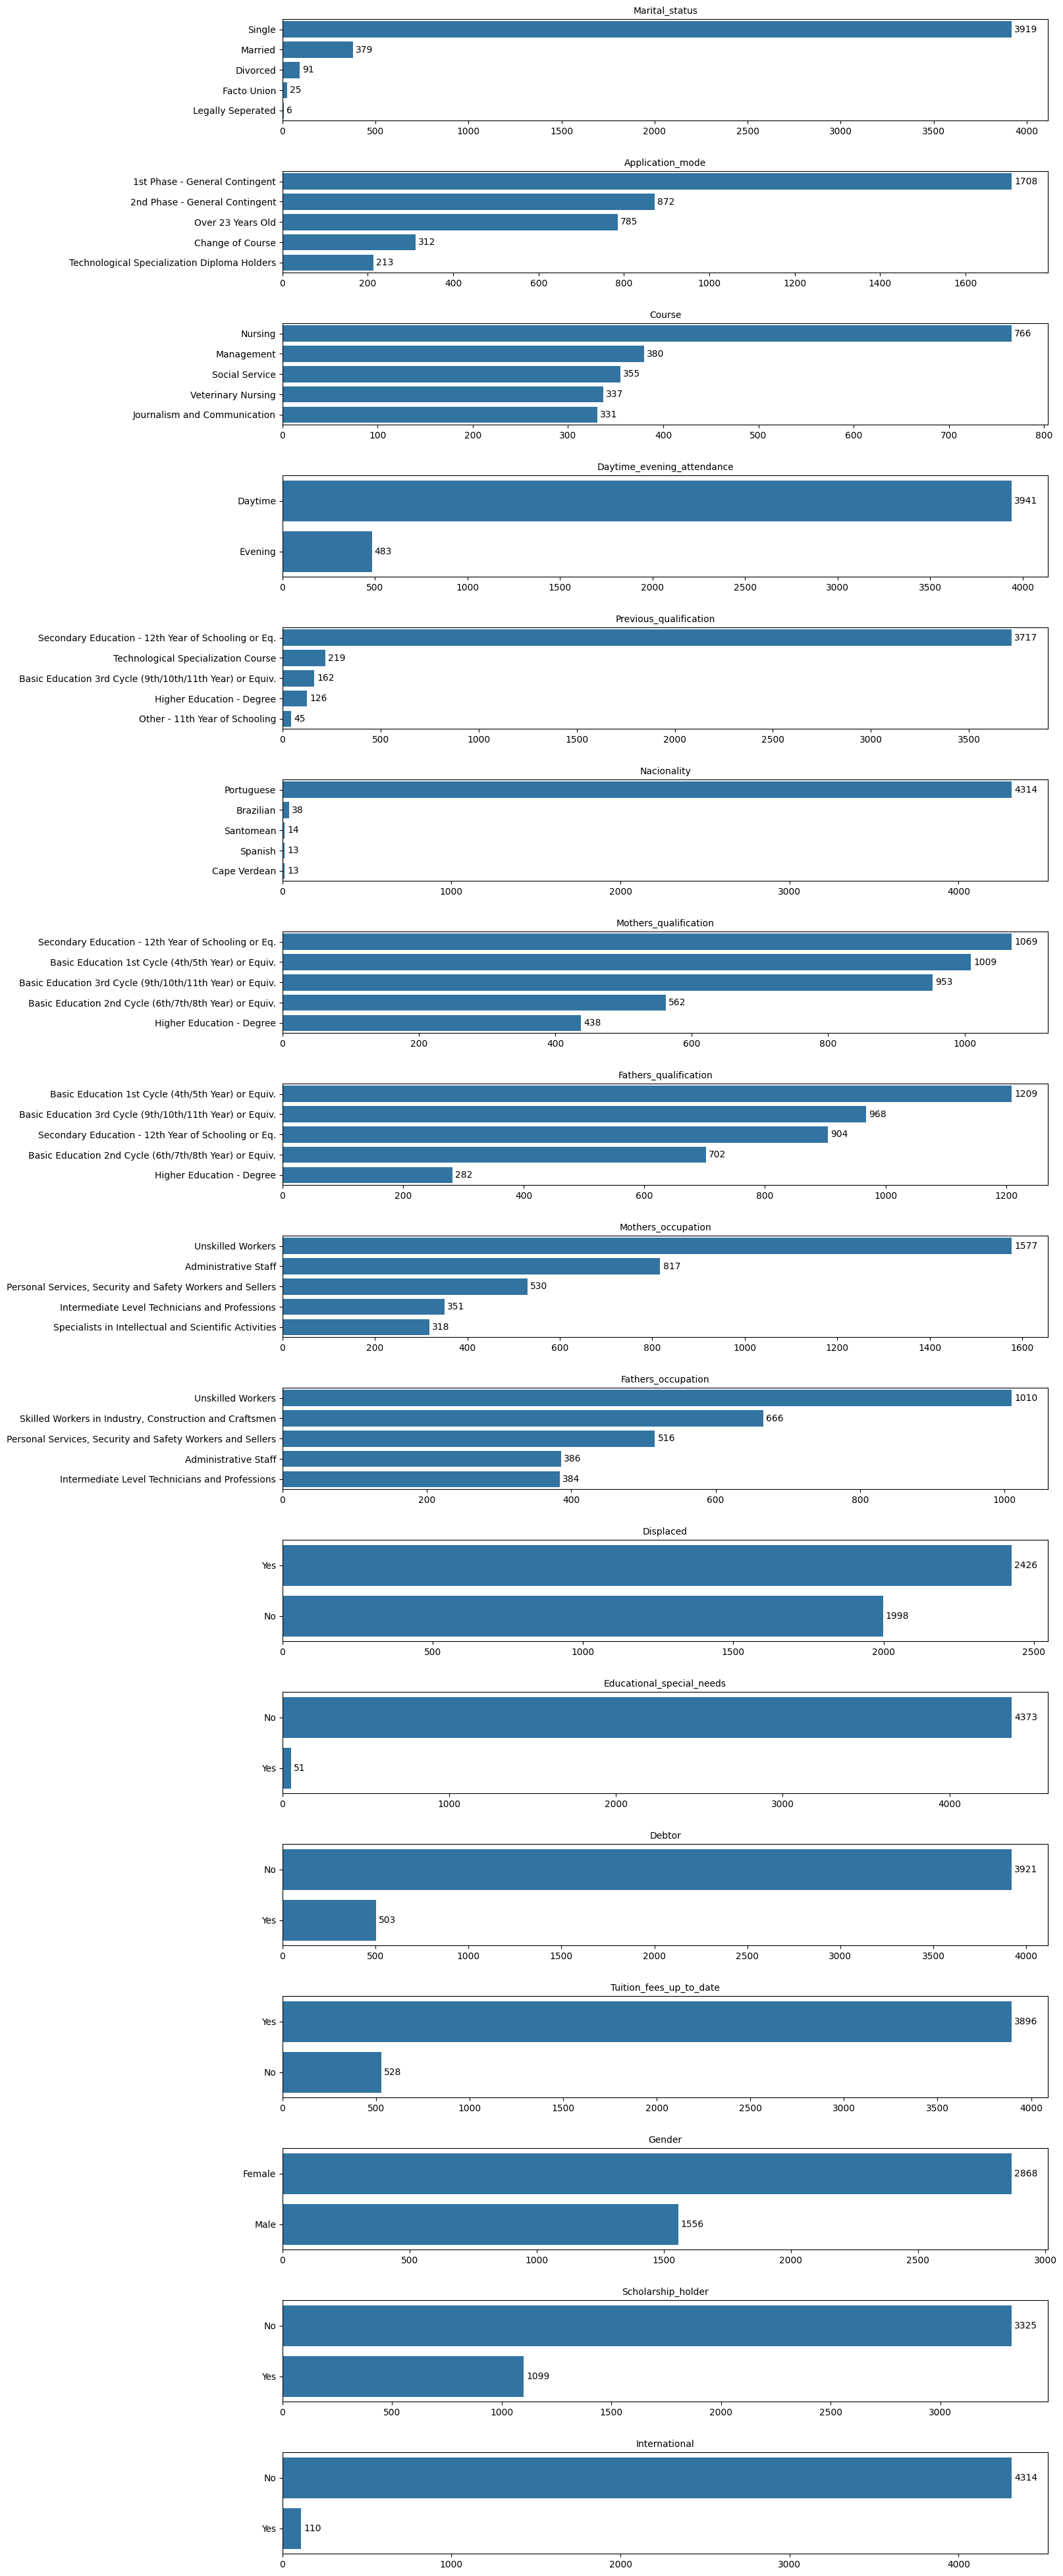

In [14]:
# Value distribution dengan label angka
fig, ax = plt.subplots(len(quali_columns), 1, figsize=(15, 50))
plt.subplots_adjust(hspace=0.5)

for i, feature in enumerate(quali_columns):
    top_5_values = list(df_cleaned[feature].value_counts().head(5).index)
    temp_df = df_cleaned[df_cleaned[feature].isin(top_5_values)]

    # Buat countplot
    plot = sns.countplot(data=temp_df, y=feature, ax=ax[i], order=temp_df[feature].value_counts().index)

    # Tambahkan label angka di bar-nya
    for container in plot.containers:
        plot.bar_label(container, label_type='edge', padding=3)

    ax[i].set_xlabel(None)
    ax[i].set_ylabel(None)
    ax[i].set_title(feature, fontsize=10)

plt.show()


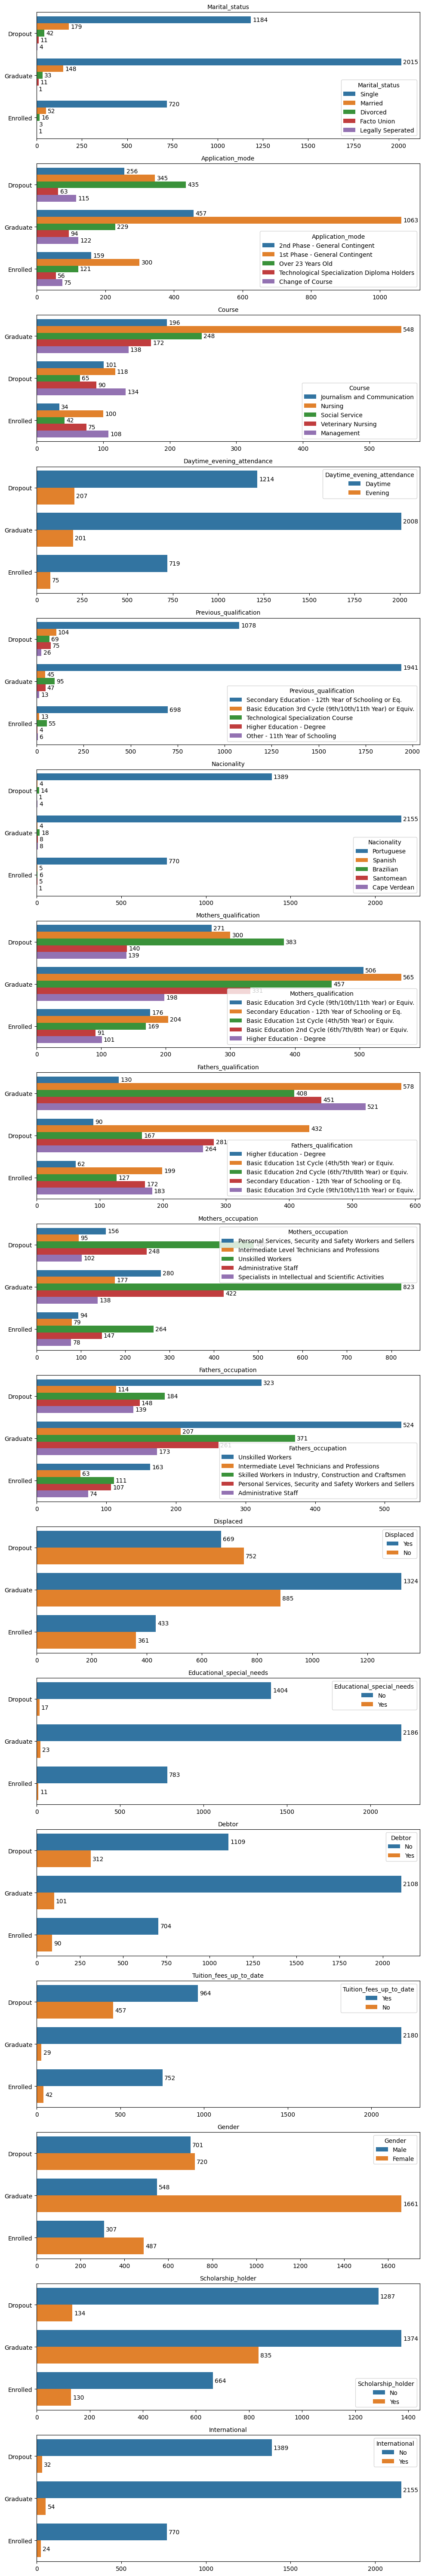

In [15]:
# Value distribution to target dengan label angka
def qualitative_plot(features, df, segment_feature=None):
    fig, ax = plt.subplots(len(features), 1, figsize=(10, 60))

    for i, feature in enumerate(features):
        top_5_values = list(df_cleaned[feature].value_counts().head(5).index)
        temp_df = df_cleaned[df_cleaned[feature].isin(top_5_values)]

        if segment_feature:
            # Plot dengan hue
            plot = sns.countplot(data=temp_df, y=segment_feature, hue=feature, ax=ax[i])
        else:
            # Plot biasa
            plot = sns.countplot(data=temp_df, x=feature, ax=ax[i])

        # Tambahkan label angka pada setiap bar
        for container in plot.containers:
            plot.bar_label(container, label_type='edge', padding=3)

        ax[i].set_title(feature, fontsize=10)
        ax[i].set_xlabel(None)
        ax[i].set_ylabel(None)

    plt.tight_layout()
    plt.show()

# Panggil fungsi
qualitative_plot(
    features=quali_columns,
    df=df_cleaned,
    segment_feature=target
)


- **Course**: Manajemen, hampir setengahnya adalah dropout.

- **Tuition_fees_up_to_date** : Hampir semua mahasiswa yang telat membayar UKT adalah dropout.

- **Gender** : Jumlah mahasiswa Perempuan lebih banyak yang dropout dibandingkan dengan laki-laki

- **international** : Mahasiswa internasional sangat sedikit yang dropout

## **Quantitative Features**

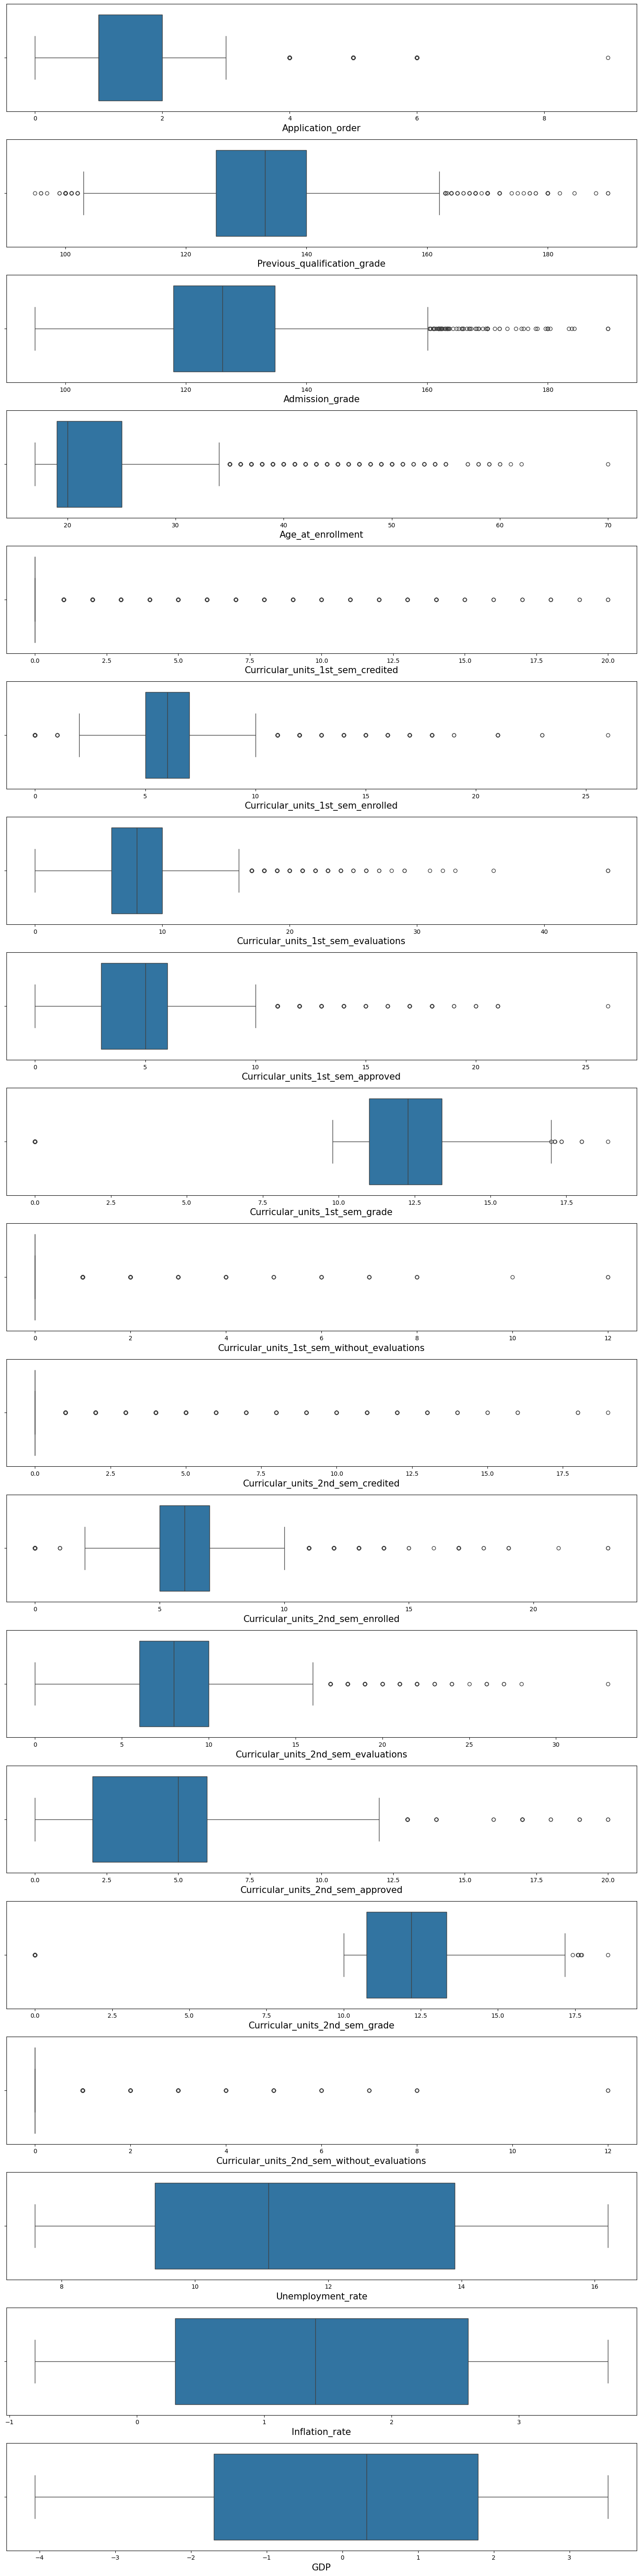

In [16]:
def quantitative_dis_plot(features, df, segment_feature=None, showfliers=True):
    fig, ax = plt.subplots(len(features), 1,figsize=(15,60))
    for i, feature in enumerate(features):
        if segment_feature:
            sns.boxplot(y=segment_feature, x=feature, data=df_cleaned, ax=ax[i], showfliers=showfliers, hue=segment_feature)
            ax[i].set_ylabel(None)
        else:
            sns.boxplot(x=feature, data=df, ax=ax[i], showfliers=showfliers)
            ax[i].set_xlabel(feature, fontsize=15)
    plt.tight_layout()
    plt.show()

quantitative_dis_plot(
    features=quanti_columns,
    df=df_cleaned
)

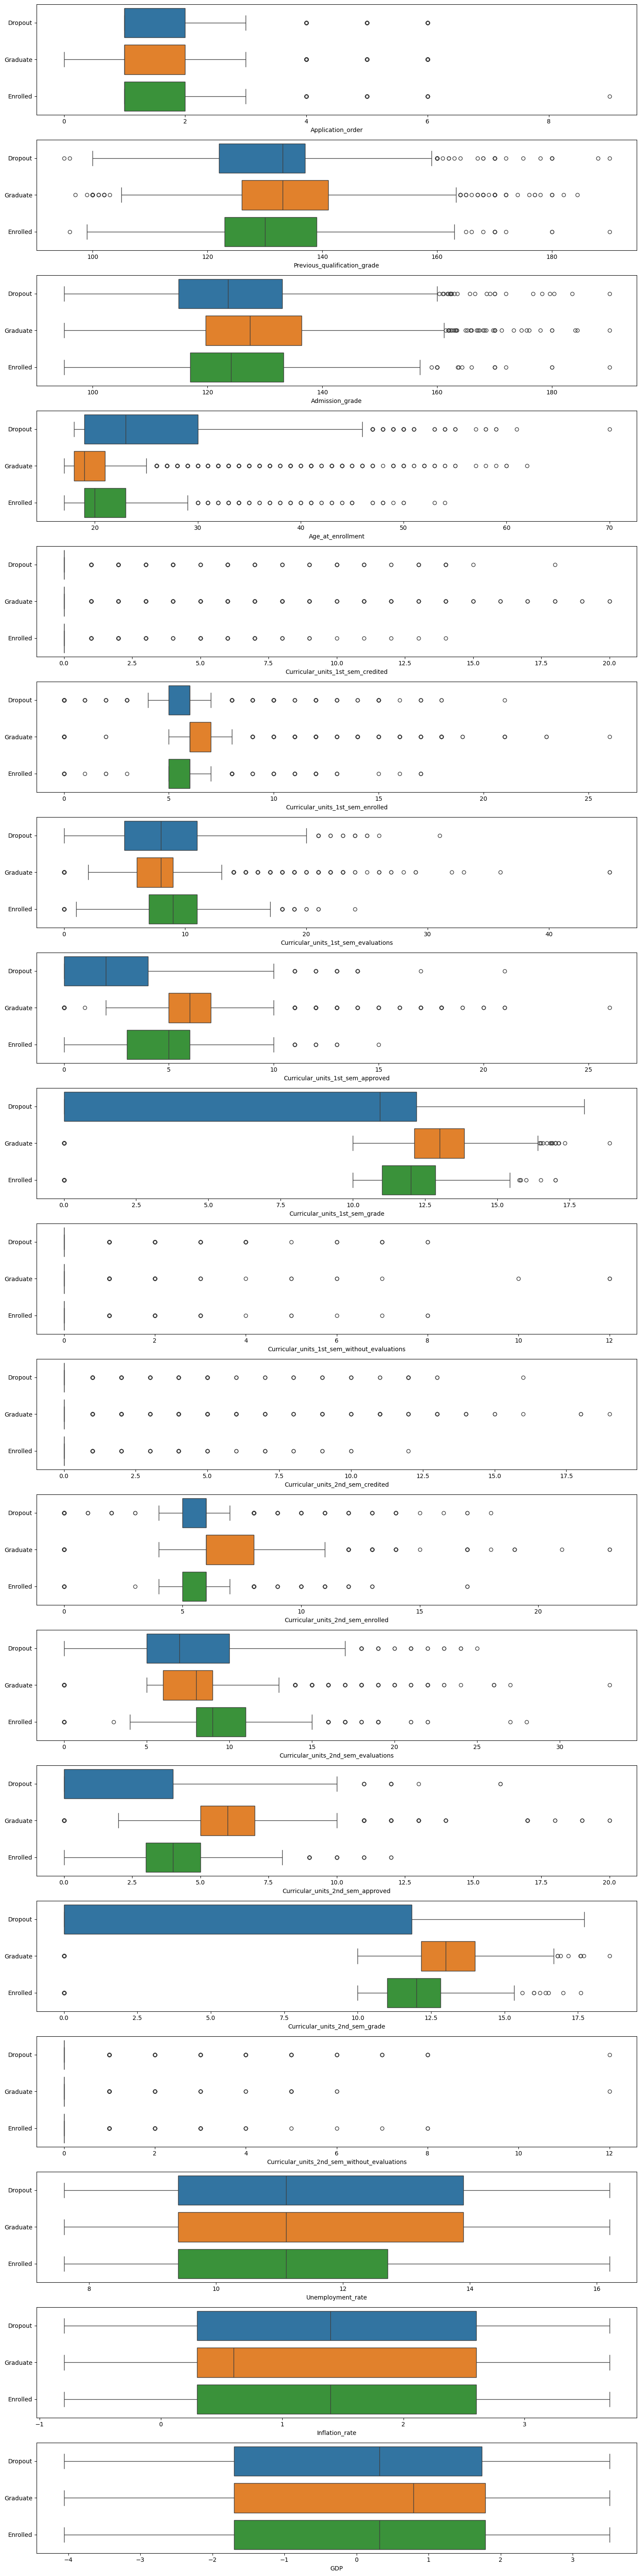

In [17]:
quantitative_dis_plot(
    features=quanti_columns,
    df=df_cleaned,
    segment_feature=target
)

- **Admission_grade** : Nilai di bawah 120 cenderung memiliki kemungkinan dropout lebih tinggi.

- **Age_at_enrollment** : Usia lebih dari 23 tahun cenderung memiliki kemungkinan dropout lebih tinggi.

- **All curricular features** : Semakin rendah nilainya, maka kemungkinan dropout semakin tinggi.

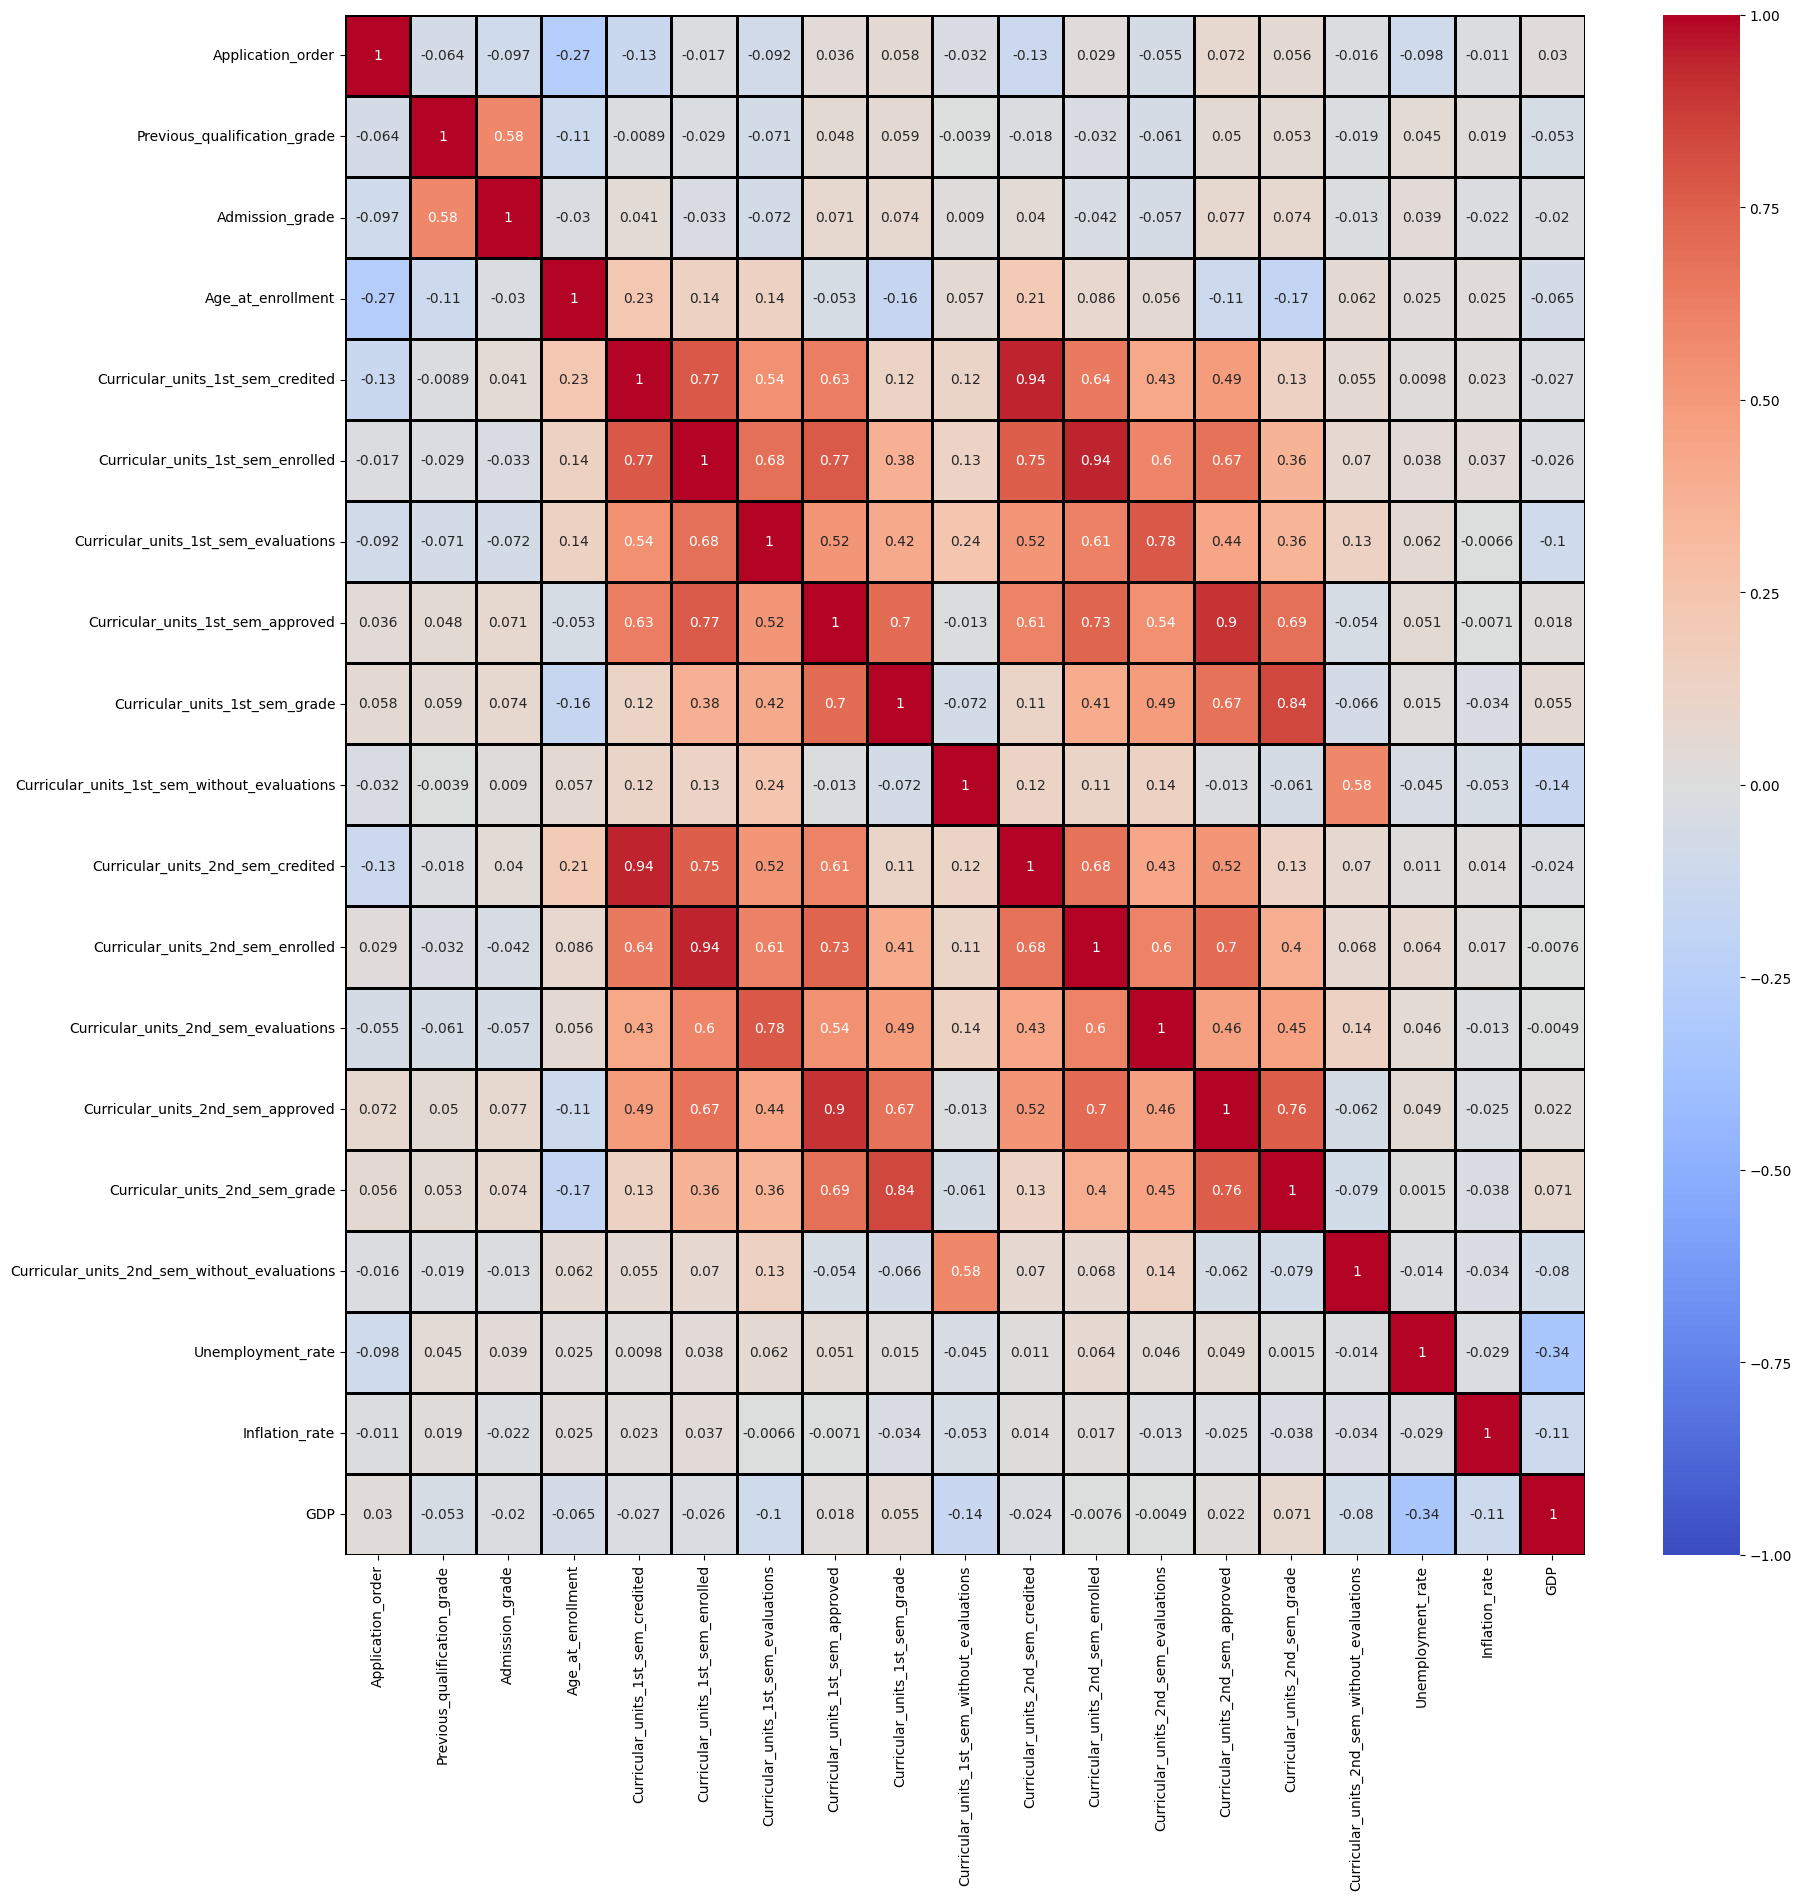

In [18]:
plt.figure(figsize=(20, 20))
sns.heatmap(df_cleaned[quanti_columns].corr(), annot=True, cmap='coolwarm', linecolor='black', linewidth=1,
            vmin=-1, vmax=1)
plt.show()


# **Data Preprocessing**

## **Label Encoding**

In [19]:
le = LabelEncoder()
df['Status'] = le.fit_transform(df['Status'])

dict(zip(le.classes_, le.transform(le.classes_)))

{'Dropout': np.int64(0), 'Enrolled': np.int64(1), 'Graduate': np.int64(2)}

In [20]:
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2


In [21]:
dict(zip(le.classes_, le.transform(le.classes_)))

{'Dropout': np.int64(0), 'Enrolled': np.int64(1), 'Graduate': np.int64(2)}

Disini kita tidak membutuhkan status 1 `(Enrolled)`, lalu ubah 2 `(Graduate)` menjadi 1

In [22]:
df = df[df['Status'] != 1]
df = df.reset_index(drop=True)

df.loc[:, 'Status'] = df['Status'].replace({2: 1})
df

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3625,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,1
3626,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,0
3627,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,0
3628,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,1


In [23]:
df['Status'].value_counts()

,count
Status,
1,2209
0,1421


pada dataset ini, `Status` digunakan sebagai Label, untuk mengetahui apakah mahasiswa lulus atau tidak

## **Feature Selection**

In [24]:
df = df.loc[:, df.corr()['Status'].abs().ge(0.1)]
df

,Marital_status,Application_mode,Previous_qualification_grade,Admission_grade,Displaced,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Status
0,1,17,122.0,127.3,1,0,1,1,0,20,0,0,0.000000,0,0,0,0.000000,0,0
1,1,15,160.0,142.5,1,0,0,1,0,19,6,6,14.000000,6,6,6,13.666667,0,1
2,1,1,122.0,124.8,1,0,0,1,0,19,6,0,0.000000,6,0,0,0.000000,0,0
3,1,17,122.0,119.6,1,0,1,0,0,20,6,6,13.428571,6,10,5,12.400000,0,1
4,2,39,100.0,141.5,0,0,1,0,0,45,6,5,12.333333,6,6,6,13.000000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3625,1,1,125.0,122.2,0,0,1,1,0,19,6,5,13.600000,6,8,5,12.666667,0,1
3626,1,1,120.0,119.0,1,1,0,0,0,18,6,6,12.000000,6,6,2,11.000000,0,0
3627,1,1,154.0,149.5,1,0,1,0,1,30,7,7,14.912500,8,9,1,13.500000,0,0
3628,1,1,180.0,153.8,1,0,1,0,1,20,5,5,13.800000,5,6,5,12.000000,0,1


In [25]:
df.describe()

,Marital_status,Application_mode,Previous_qualification_grade,Admission_grade,Displaced,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Status
count,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000
mean,1.184298,18.421763,132.920606,127.293939,0.549036,0.113774,0.866116,0.344077,0.266942,23.461157,6.337466,4.791460,10.534860,6.296419,7.763085,4.518457,10.036155,0.142149,0.608540
std,0.613009,17.358595,13.238373,14.611295,0.497658,0.317580,0.340575,0.475132,0.442423,7.827994,2.570773,3.237845,5.057694,2.263020,3.964163,3.162376,5.481742,0.747670,0.488144
min,1.000000,1.000000,95.000000,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,125.000000,118.000000,0.000000,0.000000,1.000000,0.000000,0.000000,19.000000,5.000000,3.000000,11.000000,5.000000,6.000000,2.000000,10.517857,0.000000,0.000000
50%,1.000000,17.000000,133.100000,126.500000,1.000000,0.000000,1.000000,0.000000,0.000000,20.000000,6.000000,5.000000,12.341429,6.000000,8.000000,5.000000,12.333333,0.000000,1.000000
75%,1.000000,39.000000,140.000000,135.100000,1.000000,0.000000,1.000000,1.000000,1.000000,25.000000,7.000000,6.000000,13.500000,7.000000,10.000000,6.000000,13.500000,0.000000,1.000000
max,6.000000,57.000000,190.000000,190.000000,1.000000,1.000000,1.000000,1.000000,1.000000,70.000000,26.000000,26.000000,18.875000,23.000000,33.000000,20.000000,18.571429,12.000000,1.000000


## **Export Data to CSV for Prediction**

In [26]:
df.to_csv('student_data_final.csv', index=False)

## **Data Split**

In [27]:
X = df.drop(['Status'], axis=1)
y = df['Status']

Disini kita memisahkan dataframe menjadi independen variable (X) dan dependen variable (y)

## **Data Resampling**

In [28]:
smote = SMOTE(random_state=20241124)
X_smote, y_smote = smote.fit_resample(X, y)

y_counter = collections.Counter(y)
y_smote_counter = collections.Counter(y_smote)

df_comparison = pd.DataFrame({
    'None': y_counter,
    'SMOTE': y_smote_counter
})

df_comparison.loc['Total'] = [sum(y_counter.values()), sum(y_smote_counter.values())]
df_comparison

,None,SMOTE
0,1421,2209
1,2209,2209
Total,3630,4418


## **Train-Test Split**

In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    X_smote, y_smote, test_size=0.2, random_state=20241116, stratify=y_smote)

print('X_train :', X_train.shape)
print('y_train :', y_train.shape)
print('X_test  :', X_test.shape)
print('y_test  :', y_test.shape)

X_train : (3534, 18)
y_train : (3534,)
X_test  : (884, 18)
y_test  : (884,)


Memisahkan data yang telah di-resampling menjadi data training dan data testing

## **Standardization**

In [30]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(f'X_train:\n{X_train}\n')
print(f'X_test:\n{X_test}')

X_train:
[[-0.29437224  1.43984557  0.56572219 ... -0.00432693  0.60159057
  -0.18461772]
 [-0.29437224 -1.03991657  0.41333811 ...  0.61980994  0.65521521
  -0.18461772]
 [-0.29437224  1.15150114  1.3276426  ...  0.30774151  0.77970097
  -0.18461772]
 ...
 [-0.29437224 -0.69390325  0.56572219 ...  0.61980994  0.90897465
  -0.18461772]
 [-0.29437224 -1.03991657 -1.72003903 ...  0.61980994  0.43497116
  -0.18461772]
 [-0.29437224 -1.03991657  0.26095403 ...  0.61980994  0.61451794
  -0.18461772]]

X_test:
[[-0.29437224 -1.03991657 -2.4057674  ...  0.61980994  0.63606355
  -0.18461772]
 [-0.29437224  1.3245078  -0.65335046 ...  1.2439468   0.61645704
  -0.18461772]
 [-0.29437224  1.43984557  0.56572219 ... -1.25260065 -1.6046802
  -0.18461772]
 ...
 [ 1.45699391 -0.69390325 -0.95811862 ... -0.62846379  0.46369865
  -0.18461772]
 [-0.29437224 -1.03991657 -0.31926549 ... -1.25260065 -1.6046802
  -0.18461772]
 [-0.29437224 -0.52089659  0.56572219 ...  0.93187837  0.34796793
  -0.18461772]]


# **Modeling**

In [31]:
models = {
    'LR': LogisticRegression(class_weight='balanced', max_iter=10000),
    'SVM': SVC(class_weight='balanced', max_iter=10000),
    'DT': DecisionTreeClassifier(class_weight='balanced'),
    'GB': GradientBoostingClassifier(),
    'RF': RandomForestClassifier(class_weight='balanced'),
    'KNN': KNeighborsClassifier(),
    'NB': GaussianNB()
}

metrics = {metric: [] for metric in ['Accuracy', 'Precision', 'Recall', 'F1-Score']}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_test)

    metrics['Accuracy'].append(accuracy_score(y_test, pred))
    metrics['Precision'].append(precision_score(y_test, pred))
    metrics['Recall'].append(recall_score(y_test, pred))
    metrics['F1-Score'].append(f1_score(y_test, pred))

In [32]:
model_metrics = pd.DataFrame(metrics, index=models.keys())
model_metrics

,Accuracy,Precision,Recall,F1-Score
LR,0.910633,0.900662,0.923077,0.911732
SVM,0.912896,0.887473,0.945701,0.915663
DT,0.863122,0.883055,0.837104,0.859466
GB,0.911765,0.893939,0.934389,0.913717
RF,0.919683,0.900648,0.943439,0.921547
KNN,0.889140,0.859833,0.929864,0.893478
NB,0.846154,0.808468,0.907240,0.855011


Dari hasil matrik diatas, model Random Forest Classifier mendapatkan hasil paling bagus, sehingga saya akan gunakan

In [33]:
model_rf = RandomForestClassifier(class_weight='balanced').fit(X_train, y_train)
model_rf

RandomForestClassifier(class_weight='balanced')

In [34]:
y_train_rf = model_rf.predict(X_train)
y_test_rf = model_rf.predict(X_test)

# **Evaluation**

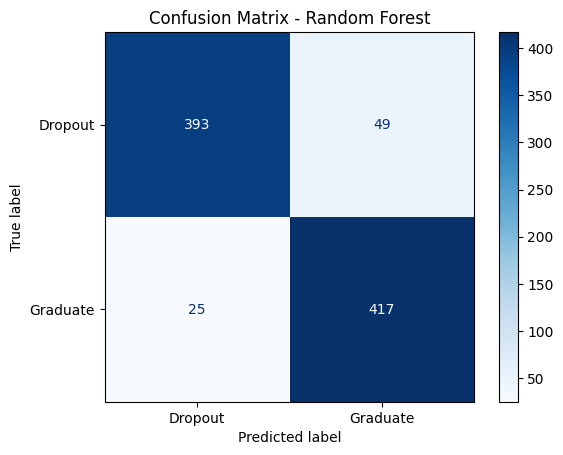

In [35]:
# === 1. Confusion Matrix ===
cm = confusion_matrix(y_test, y_test_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Dropout', 'Graduate'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.show()


Dari hasil confusion matrix diatas, model Random Forest mendapatkan beberapa kesalahan prediksi, pada Status `Dropout` terdapat 46 kesalahan prediksi, dan pada Status `Graduate` terdapat 30 kesalahan prediksi

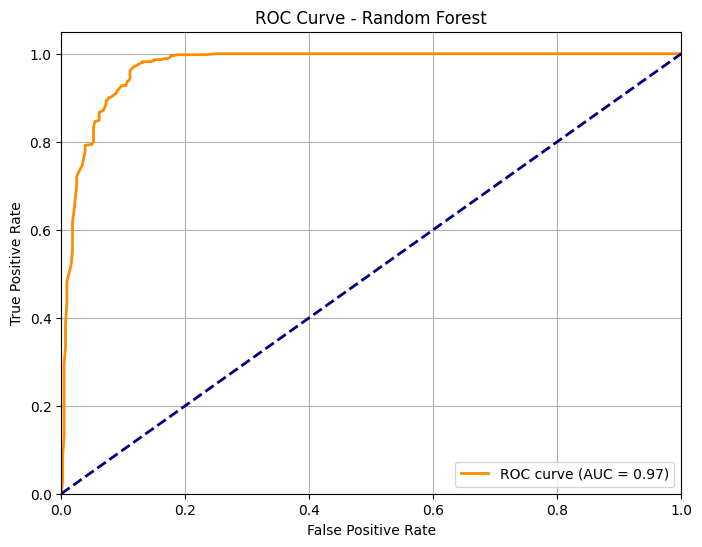

In [36]:
# Prediksi probabilitas kelas 1 (misalnya "Graduate" jika label 1 adalah Graduate)
y_proba_rf = model_rf.predict_proba(X_test)[:, 1]

# Hitung false positive rate, true positive rate, dan AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba_rf)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc='lower right')
plt.grid()
plt.show()


Dari hasil ROC Curve diatas dapat dilihat bahwa model Random Forest dapat memprediksi dengan baik. AUC 0.97 berarti bahwa jika memilih satu mahasiswa dropout dan satu graduate secara acak, maka 97% kemungkinan model akan mengurutkannya dengan benar.

# **Hyperparameter Tuning**

In [37]:
param_dist = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [None, 5, 10, 15, 20, 25],
    'min_samples_split': [2, 3, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Inisialisasi model dasar RandomForest
rf_base = RandomForestClassifier(class_weight='balanced', random_state=20241124)

random_search = RandomizedSearchCV(
    estimator=rf_base,
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    scoring='f1_macro',  # atau 'balanced_accuracy'
    random_state=42,
    n_jobs=-1
)


In [38]:
random_search.fit(X_train, y_train)
best_rf = random_search.best_estimator_

In [39]:
y_train_best = best_rf.predict(X_train)
y_test_best = best_rf.predict(X_test)

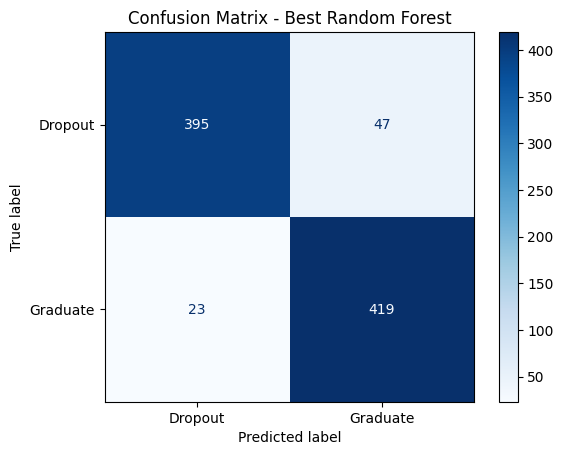

In [40]:
# Confusion Matrix untuk model terbaik (best_rf) dengan label khusus
cm = confusion_matrix(y_test, y_test_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Dropout', 'Graduate'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Best Random Forest")
plt.show()


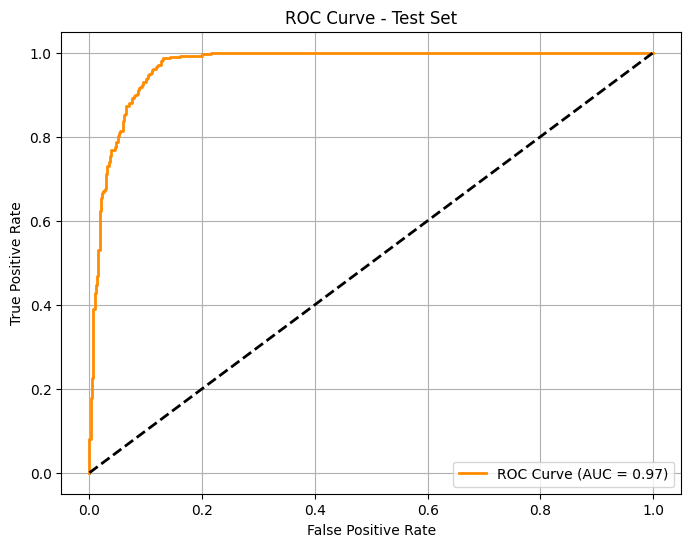

In [41]:
# Probabilitas prediksi untuk kelas positif
y_test_proba = best_rf.predict_proba(X_test)[:, 1]

# Hitung nilai ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
roc_auc = auc(fpr, tpr)

# Tampilkan ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color='darkorange', lw=2)
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Test Set")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


Setelah dilakukan hyperparameter tuning, model dapat memprediksi lebih baik. Dimana sebelum dilakukan hyperparameter tuning, model melakukan kesalahan prediksi pada label `dropout` sebanyak 48 dan `graduate` sebanyak 28, setelah ditambahkan hyperparameter untu7k label `dropout` turun menjadi 47, dan `graduate` turun menjadi 23. Sementara hasil ROC Curve tidak ada perbedaan yang signifikan

# **Save Model & requirements**

In [42]:
joblib.dump(best_rf, 'model_rf.joblib')

['model_rf.joblib']

In [43]:
!pip freeze > requirements.txt